# <span style="color:blue">**Capítulo 5**</span>
## <font color=blue size=8> Ensamble: Bagging y Boosting </font>

#### <font color=blue> *Mejora del rendimiento del árbol de decisiones mediante métodos de conjunto* </font>

En el capítulo anterior, aprendiste el algoritmo de árboles de decisión. Construir árboles eficientes suele ser un proceso complejo y que consume mucho tiempo, especialmente en conjuntos de datos con alta varianza. Para mejorar el rendimiento de los árboles de decisión, utilizamos los métodos estadísticos de ensamble: bagging y boosting. Se han diseñado varios métodos de este tipo. En este capítulo, aprenderás los siguientes métodos:

• Random Forest  
• ExtraTrees  
• Bagging  
• AdaBoost  
• Gradient Boosting  
• XGBoost  
• CatBoost  
• LightGBM  

Así que, primero, entendamos los términos bagging y boosting.

## ¿Qué son Bagging y Boosting?  

Bagging y boosting son métodos de ensamble, en los cuales los resultados de múltiples modelos entrenados utilizando el mismo algoritmo se combinan para generar una salida final. Ahora describiré ambos métodos.

### Bagging

En el caso de bagging, generamos datos adicionales para el entrenamiento a partir del mismo conjunto de datos original utilizando repeticiones de algunos puntos de datos. Luego entrenamos múltiples modelos en estos subconjuntos y los combinamos para obtener un modelo final. Con boosting, observamos las predicciones de un modelo de clasificación. Si una observación es clasificada incorrectamente, le asignamos un peso adicional para aumentar su importancia. Este es un proceso iterativo y, al final, obtenemos un modelo predictivo más sólido.  

Los subconjuntos de datos que necesitamos pueden crearse mediante dos estrategias diferentes:  
• Bootstrap  
• Out-of-bag 

En bootstrap, el subconjunto se crea reemplazando algunos puntos de datos con muestras seleccionadas aleatoriamente del original. Como resultado, el subconjunto tendrá el mismo número de puntos que el original. 

Entrenamos el mismo algoritmo en diferentes conjuntos creados de esta manera y tomamos el promedio de todas las predicciones, lo que será sin duda más robusto que usar un solo clasificador sobre el conjunto original completo. Esto eliminará efectivamente la varianza en las predicciones observada en múltiples ejecuciones utilizando un solo clasificador.

En el caso de la estrategia out-of-bag, creamos el subconjunto tomando la diferencia entre el conjunto original y los conjuntos bootstrap. La figura 5.1 muestra cómo se crean tanto los conjuntos bootstrap como los out-of-bag. 

<div>
  <img src="fig5.1.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.1</p>

<p>Conjuntos de datos de Bootstrap y fuera de bolsa.</p>

Como puedes observar, cada conjunto bootstrap contiene el mismo número de instancias que el conjunto original. En cada conjunto bootstrap, algunos puntos de datos se repiten. Los conjuntos out-of-bag correspondientes contienen un número variable de instancias, dependiendo de cuántos puntos se repitieron en el conjunto bootstrap.

### Boosting

En el caso de boosting, comenzamos con un aprendiz débil y lo fortalecemos a lo largo de múltiples pasos hasta que estemos satisfechos con los resultados de clasificación obtenidos por el último clasificador. En cada paso, observamos las clasificaciones incorrectas realizadas por una hipótesis y aumentamos su peso para que la siguiente hipótesis tenga más probabilidades de clasificarla correctamente.

De esta manera, seguimos construyendo modelos más fuertes, y por eso este proceso se denomina adecuadamente boosting. Con esta breve introducción, ahora empezaré a describir los distintos algoritmos, comenzando con random forest.

## Random Forest

### *En Pocas Palabras*

En lugar de una decisión tomada por una sola persona, decides basándote en las decisiones tomadas por varias. Este es el principio que se utiliza en los algoritmos de random forest. Antes, vimos la construcción de un solo árbol de decisión sobre todo el conjunto de datos. Esto es como una decisión individual para hacer predicciones sobre datos no vistos. En lugar de eso, hagamos múltiples árboles dividiendo aleatoriamente el conjunto de datos en varias partes. Ahora, deja que cada árbol de decisión haga una predicción. La votación mayoritaria —la agregación de predicciones— decidirá la predicción final realizada por el modelo completo.

### ¿Qué es Random Forest?


Random forest es un algoritmo de aprendizaje supervisado que se puede usar para resolver tanto problemas de regresión como de clasificación. Se basa en el concepto de aprendizaje en conjunto (ensemble learning), que consiste en combinar múltiples clasificadores para resolver un problema complejo. El random forest contiene varios árboles de decisión construidos sobre diferentes subconjuntos del conjunto de datos. Gracias a la votación mayoritaria, mejora la precisión predictiva del modelo en comparación con un solo árbol de decisión.  
La Figura 5.2 ilustra el concepto. Ahora, veamos el algoritmo para construir un random forest.

<div>
  <img src="fig5.2.png" width="550"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.2</p>

<p>Trabajo del Random Forest (Bosque Aleatorio).</p>

### Algoritmo de Random Forest

Construir un random forest es un proceso sencillo. Estos son los pasos algorítmicos para construirlo:  

1. Selecciona K puntos de datos al azar del conjunto de datos completo.  
2. Construye un árbol de decisión con los K puntos de datos seleccionados.  
3. Repite los pasos 1 y 2 para construir N árboles.  

Para predecir un punto de datos no visto, utiliza los votos de cada árbol. Para clasificación, usa votación mayoritaria y para regresión, utiliza el promedio. 

### Ventajas 

Aquí hay algunas ventajas de este algoritmo:  
• La construcción de árboles es más rápida ya que cada árbol se construye sobre un subconjunto de datos con un subconjunto de características.  
• El algoritmo es paralelizable, lo que permite un entrenamiento más rápido.  
• Ofrece mejor precisión incluso en conjuntos de datos grandes.  

### Aplicaciones 

Los científicos de datos han usado con éxito el algoritmo random forest en muchos sectores.  
En el sector bancario, se usa para detección de fraudes con tarjetas de crédito, segmentación de clientes y predicción de morosidad en préstamos.  
En medicina, se aplica en clasificación de tratamientos farmacológicos, diagnóstico de cáncer de mama, predicción de enfermedades cardiovasculares y detección de diabetes.  
En comercio electrónico, se emplea para recomendaciones de productos, predicciones de ventas, optimización de precios y rankings de búsqueda.  
Estos son solo algunos ejemplos. El algoritmo random forest ha encontrado numerosos casos de uso en distintos dominios.  

### Implementación


La librería sklearn implementa este algoritmo en la clase `sklearn.ensemble.RandomForestClassifier`. Así es como se invoca el algoritmo:

In [218]:
# model = RandomForestClassifier(n_estimators = 10,
#    n_jobs = -1, criterion = "entropy",
#    max_features = "auto",
#    random_state = 1234)
# model.fit(X_train, y_train)

El modelo acepta varios parámetros; puedes establecer algunos parámetros esenciales como se muestra en la declaración anterior; el resto utiliza sus valores predeterminados.  
Una vez que el modelo ha sido entrenado, puedes evaluar su precisión sobre los datos de prueba llamando al método `score`.  

In [219]:
# model.score(X_test, y_test)

### Proyecto de Random Forest

Para ilustrar el uso del algoritmo de random forest, he creado un proyecto. El proyecto es exhaustivo y también muestra el uso de random forest para la selección de características (*feature selection*). Además, enseña cómo ajustar los parámetros del algoritmo (*hyper-tuning*). En lugar de usar un conjunto de datos grande y complejo, he utilizado el conjunto de datos *iris* para enfocarnos más en el aprendizaje del algoritmo. El conjunto de datos *iris* está disponible como parte de la librería sklearn. Para tu rápida referencia, imprime las características y el objetivo (*target*) del conjunto de datos.

In [220]:
from sklearn import datasets
iris = datasets.load_iris()
import seaborn as sns
import matplotlib.pyplot as plt

Estas son las características:

In [221]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Y estos son los nombres de las clases objetivo:

In [222]:
print (iris.target_names)

['setosa' 'versicolor' 'virginica']


Como puedes ver, hay tres clases en la variable objetivo. Por lo tanto, esta es una tarea de clasificación multiclase.

#### Creación de un DataFrame

In [223]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [224]:
data.shape

(150, 5)

In [225]:
data.size

750

In [226]:
data.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Realicé un análisis univariante en el conjunto de datos para verificar qué características proporcionan una mejor separación de las clases. La figura 5.3 muestra las separaciones de clases para las cuatro características.

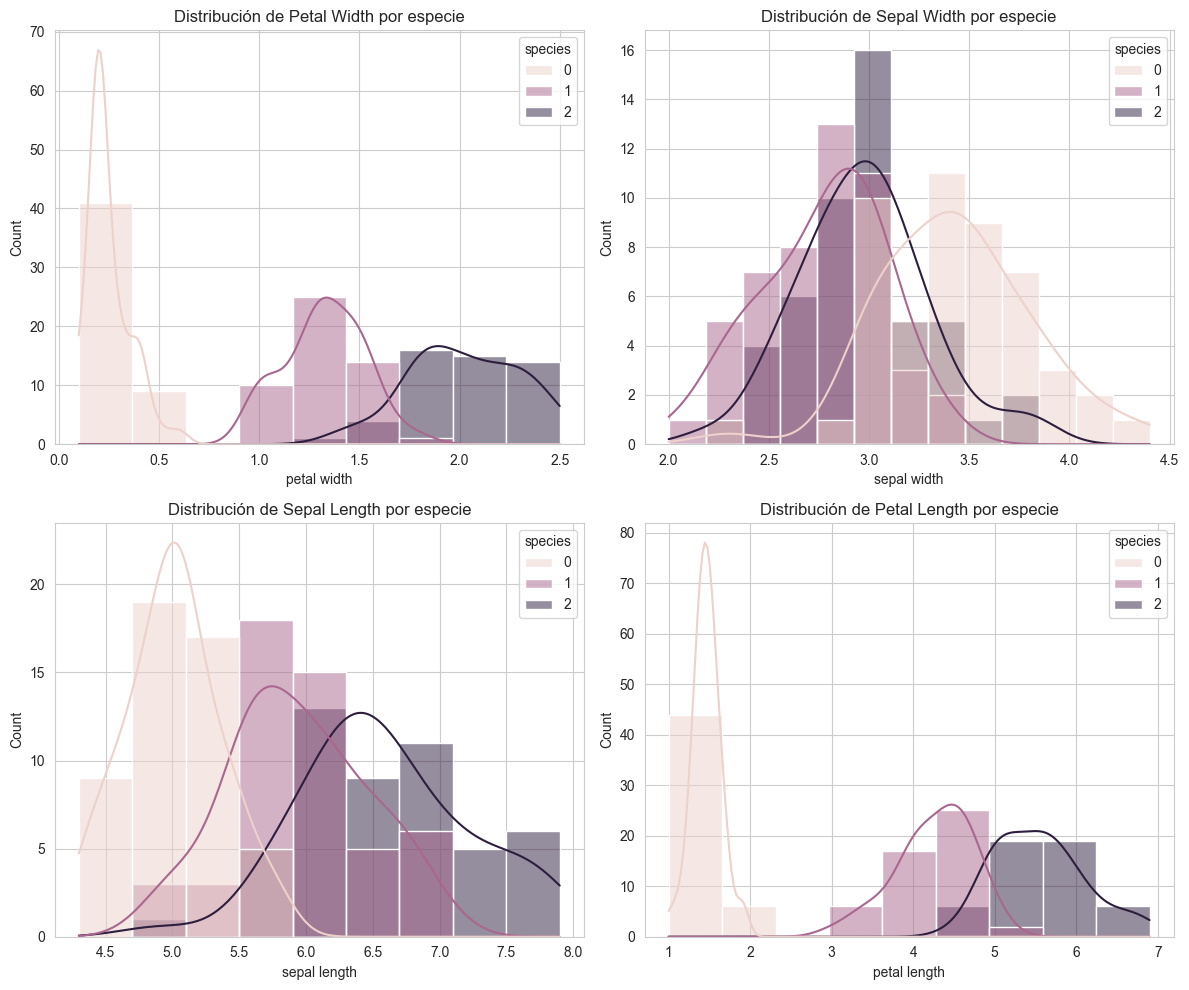

In [227]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=data, x="petal width", hue="species", kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribución de Petal Width por especie")

sns.histplot(data=data, x="sepal width", hue="species", kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribución de Sepal Width por especie")

sns.histplot(data=data, x="sepal length", hue="species", kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribución de Sepal Length por especie")

sns.histplot(data=data, x="petal length", hue="species", kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribución de Petal Length por especie")

plt.tight_layout()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.3</p>

<p>Distribuciones de clases para diversas funciones.</p>

Al observar los cuatro gráficos, vemos que probablemente la anchura del pétalo (*petal width*) proporciona una mejor separación de las tres clases.  

#### Creación de conjuntos de datos de entrenamiento/prueba

In [228]:

from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Construcción de Modelo

Después de crear los conjuntos de entrenamiento y prueba, aplicaremos el algoritmo de *random forest* usando el snippet de código correspondiente.

In [229]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

#### Predicción del Modelo

Una vez entrenado el modelo, realizaremos la predicción sobre los datos de prueba y verificaremos la precisión del modelo.

In [230]:
y_pred=clf.predict(X_test)

#### Métricas de Rendimiento

Este es el resultado que obtuve en mi ejecución:

In [231]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
acc = metrics.accuracy_score(y_test, y_pred)
acc = acc * 100
acc

Accuracy: 0.9333333333333333


93.33333333333333

### Informe

También se puede imprimir el informe de características. El resultado se muestra en la figura 5.4.  

In [232]:
print("Classification report",metrics.classification_report(y_test, y_pred))

Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.86      0.89        14
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.4</p>

<p>Informe de clasificación.</p>

In [233]:
df = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [234]:
df.sort_index()

,predictions,actual
3,0,0
4,0,0
6,0,0
9,0,0
13,0,0
16,0,0
18,0,0
20,0,0
22,0,0
26,0,0


#### Visualización de Características Importantes

*Random forest* permite revisar la importancia de las características examinando el valor de un atributo. Este es el resultado:

In [235]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.503049
petal width (cm)     0.358741
sepal length (cm)    0.089814
sepal width (cm)     0.048397
dtype: float64

También se puede graficar la importancia de las características, como se ve en la figura 5.5. 

C:\Users\HP\AppData\Local\Temp\ipykernel_16032\3761377551.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


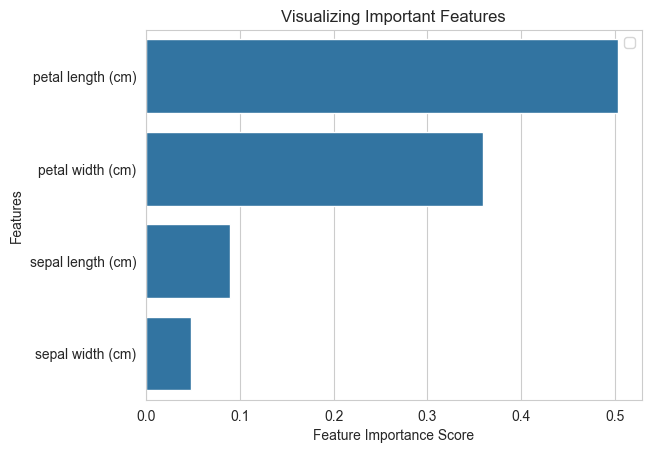

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.5</p>

<p>Importancia de las características en el conjunto de datos del iris.</p>

Como se observa, la anchura del pétalo (*petal width*) es la característica más importante para la separación de clases. Este resultado coincide con nuestra inspección manual previa.  
La anchura del sépalo (*sepal width*) tiene el menor impacto en la clasificación, por lo que podemos intentar eliminarla para reducción de dimensionalidad.

#### Reducción de Dimensiones

In [237]:
X1=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal width"
y1=data['species']                                       
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

Después de eliminar la columna, se vuelve a entrenar el modelo con el nuevo conjunto de datos. Esto nos da el siguiente puntaje de precisión:

In [238]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X1_train,y1_train)
y_pred1=rf.predict(X1_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred1))

Accuracy: 0.9777777777777777


### Informe

El informe de clasificación correspondiente se muestra en la figura 5.6.

In [239]:
print("Classification report",metrics.classification_report(y1_test, y_pred1))

Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.6</p>

<p>Informe de clasificación.</p>

In [240]:
df1 = pd.DataFrame(data={'predictions': y_pred1, 'actual': y1_test})

df1.sort_index()

,predictions,actual
2,0,0
4,0,0
7,0,0
9,0,0
14,0,0
16,0,0
19,0,0
25,0,0
26,0,0
36,0,0


Observamos que la precisión ha mejorado tras eliminar la característica menos significativa.  

A continuación, mostraré la técnica de ajuste de hiperparámetros, que utilizaremos en el resto de los proyectos de este capítulo. Para el ajuste de parámetros, usamos `GridSearchCV` de sklearn, como se muestra en el snippet de código a continuación:

#### Ajuste de Hiperparámetros

Usando validación cruzada (*cross-validation*, CV) para estimar los mejores valores de los parámetros usados en el modelo base.

In [241]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [500, 700, 1000]
}
# Create a base model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

A continuación, ajustamos (*fit*) la búsqueda en cuadrícula (*grid search*) a los datos:

**NOTA**: El siguiente proceso puede tardar alrededor de 5 minutos, dependiendo del rendimiento del CPU.

In [242]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [500, 700, 1000]},
             verbose=2)

Se especifican los distintos parámetros que deseamos ajustar junto con los valores de prueba deseados en la variable `param_grid`. El método `fit` puede tardar bastante en ejecutarse, dependiendo del número de pliegues (*folds*) que hayas definido en la lista de parámetros. 
Una vez finalizada la ejecución, puedes revisar los valores óptimos detectados. Estos son los resultados:

In [245]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 500}

El `GridSearchCV` también devuelve el mejor modelo con estos hiperparámetros ajustados. Puedes verificar su precisión. Este fue el resultado en mi ejecución:

In [252]:

import numpy as np
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy


In [253]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.0667 degrees.
Accuracy = 90.74%.


También experimenté con `GridSearchCV` sobre el conjunto de datos reducido. Observé la siguiente puntuación de precisión: 

In [255]:
print("Baseline accuracy: ", acc)
print("Accuracy after hp tuning: ", grid_accuracy)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - acc) / acc))

Baseline accuracy:  93.33333333333333
Accuracy after hp tuning:  90.74074074074073
Improvement of -2.78%.


### Resultados

La tabla 5.1 resume todas las observaciones.  
Ten en cuenta que estas cifras pueden variar en cada ejecución.

| Dataset                                     | Accuracy (%) |
|--------------------------------------------|--------------|
| Completo                                   | 97.78        |
| Reducido                                   | 97.78        |
| Completo con hiperparámetros ajustados     | 96.00        |
| Reducido con hiperparámetros ajustados     | 98.15        |

$\\$

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 5.1</p>

<p>Precisión de los modelos en distintos conjuntos de datos.</p>

## ExtraTrees

La implementación de este algoritmo se encuentra en `sklearn.ensemble`, a través de las clases `ExtraTreesRegressor` y `ExtraTreesClassifier`. El algoritmo ajusta un número de árboles de decisión aleatorios sobre distintos subconjuntos y luego utiliza el promedio de sus predicciones para mejorar la precisión y controlar el sobreajuste. 

Para mostrar su uso, creé un pequeño proyecto que incluye los algoritmos previamente explicados: Random Forest, ExtraTrees y Bagging, tal como se definen en sklearn. El algoritmo de Bagging también tiene implementaciones para regresión y clasificación, y se describe después de este. Al combinar los tres algoritmos en un solo proyecto y aplicarlos a los mismos conjuntos de datos, obtenemos la oportunidad de comparar sus desempeños. A continuación, describiré el proyecto.

### Proyecto de Conjunto con Bagging

In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Para la regresión, utilicé el conjunto de datos de superconductividad tomado del repositorio UCI. Contiene 21,263 instancias con 80 características y 1 variable objetivo. La variable objetivo es la temperatura absoluta del superconductor, determinada por el valor de todas las características combinadas. Para clasificación, utilicé un conjunto de datos molecular, también del repositorio UCI. Este dataset contiene 21 columnas (atributos moleculares) de 1,055 compuestos químicos, y la etiqueta tiene 2 clases: RB y NRB.  

#### Preparación de Conjuntos de Datos

In [258]:
df1=pd.read_csv('superconductors.csv')

In [260]:
df2=pd.read_csv('biodeg.csv', delimiter=';', header=None)

Asigna nombres a las columnas.

In [ ]:
df2.rename(columns={41:'label'}, inplace=True)

In [263]:
df2.columns = df2.columns.astype(str)

Establecemos las características y la etiqueta de los conjuntos de datos y verificamos su forma:

In [264]:
features1 = df1.iloc[:,:-1]
label1 = df1.iloc[:,-1]

In [265]:

features1.shape, label1.shape

((21263, 81), (21263,))

In [266]:
features2 = df2.iloc[:,:-1]
label2 = df2.iloc[:,-1]

In [271]:
features2.shape, label2.shape

((1055, 41), (1055,))

#### Equilibrando los Conjuntos de Datos

In [272]:
from imblearn.over_sampling import SMOTE

In [273]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(features2, label2)

In [274]:
X_res.shape

(1398, 41)

In [275]:
y_res.value_counts()

41
RB     699
NRB    699
Name: count, dtype: int64

Codificación de columnas categóricas

In [276]:
y_res=y_res.replace('NRB',0).replace('RB',1)

C:\Users\HP\AppData\Local\Temp\ipykernel_16032\1240525400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_res=y_res.replace('NRB',0).replace('RB',1)


In [277]:
y_res.value_counts()

41
1    699
0    699
Name: count, dtype: int64

#### Creación de Conjuntos de Datos de Entrenamiento/Prueba

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X_train1, X_val1, label_train1, label_val1 = train_test_split(features1, label1, test_size=0.20, random_state=42)

In [280]:
X_train1.shape, X_val1.shape, label_train1.shape, label_val1.shape

((17010, 81), (4253, 81), (17010,), (4253,))

In [281]:
X_train2, X_val2, label_train2, label_val2 = train_test_split(X_res, y_res , random_state=42, test_size = 0.2)

In [283]:
X_train2.shape, X_val2.shape, label_train2.shape, label_val2.shape

((1118, 41), (280, 41), (1118,), (280,))

Importamos algunas funciones útiles para medir el rendimiento de ambos modelos:

In [284]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [285]:
def error_metrics(y_pred,y_val):
  print('MSE: ',mean_squared_error(y_pred,y_val))
  print('RMSE: ',np.sqrt(mean_squared_error(y_pred,y_val)))
  print('Coefficient of determination: ',r2_score(y_pred,y_val))

El algoritmo proporciona un parámetro llamado `n_estimators` para especificar el número de árboles en el bosque. Experimenté con un conjunto de valores para este parámetro, de modo que puedas entender cómo encontrar su valor óptimo. Comenzaremos con el regresor.

### Regresor de Árboles

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

Evaluaremos el regresor usando 9 valores crecientes para el parámetro `n_estimators` (número de árboles). Para cada valor, calcularemos el `oob_error` (error fuera de bolsa), que, en términos simples, es una medida del error promedio de los árboles. Esto nos permitirá graficar los resultados y determinar el número óptimo de árboles donde dicho error sea mínimo.

El siguiente fragmento de código aplica el regresor sobre nuestro conjunto de datos para un conjunto de valores de `n_trees`.

In [290]:
from sklearn.ensemble import ExtraTreesRegressor
ETreg = ExtraTreesRegressor(bootstrap=True, 
                            oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300]:
    ETreg.set_params(n_estimators=n_trees)
    ETreg.fit(X_train1, label_train1)
    oob_error = 1 - ETreg.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
et_oob_df

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.096804
20.0,0.088524
30.0,0.081585
40.0,0.079040
50.0,0.077822
100.0,0.075116
150.0,0.074319
200.0,0.073789
300.0,0.073163


La salida imprimirá el puntaje *out-of-bag* (OOB) para los distintos números de árboles aleatorios en tu terminal. He trazado estos puntajes, que se pueden ver en la figura 5.7. 

[Text(0.5, 0, 'Número de Árboles')]

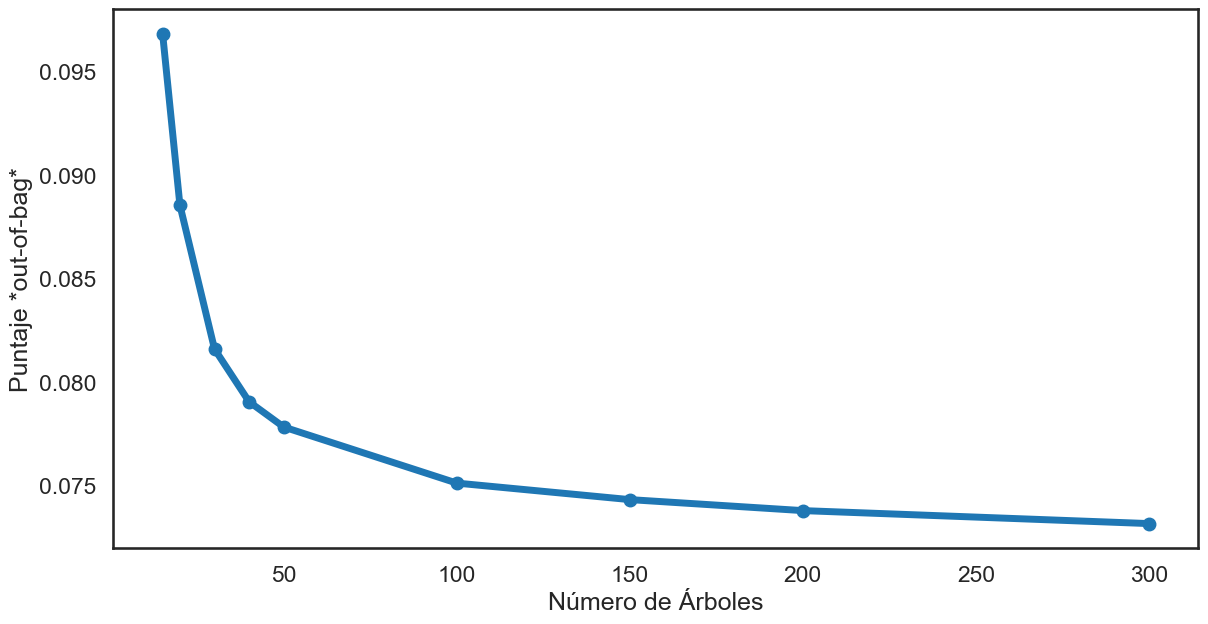

In [ ]:
sns.set_context('talk')
sns.set_style('white')
ax = et_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='Error Fuera de Bolsa (OOB)*')
ax.set(xlabel='Número de Árboles')

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.7</p>

<p>Error Fuera de Bolsa (OOB) vs Número de Árboles.</p>

Observando el diagrama, probablemente optarás por 100 o 150 como el valor óptimo para la cantidad de árboles aleatorios. 

Para experimentar el efecto de otros parámetros, probé tres parámetros listados en la tabla 5.2 y estudié sus errores OOB. Puedes experimentar con diferentes valores de estos parámetros o usar `GridSearchCV` para obtener sus valores óptimos.  

In [310]:
ETreg_300 = ExtraTreesRegressor(n_estimators=300,oob_score=True,random_state=42,n_jobs=-1,bootstrap=True,
                                max_features='log2')

ETreg_300.fit(X_train1, label_train1)
oob_error300 = 1 - ETreg_300.oob_score_
oob_error300

0.07452415203793605

In [311]:
ETreg_300 = ExtraTreesRegressor(n_estimators=300,oob_score=True,random_state=42,n_jobs=-1,bootstrap=True,
                                max_depth=3)

ETreg_300.fit(X_train1, label_train1)
oob_error300 = 1 - ETreg_300.oob_score_
oob_error300

0.31203882206742684

In [312]:
ETreg_300 = ExtraTreesRegressor(n_estimators=300,oob_score=True,random_state=42,n_jobs=-1,bootstrap=True,
                                max_samples=0.7)

ETreg_300.fit(X_train1, label_train1)
oob_error300 = 1 - ETreg_300.oob_score_
oob_error300

0.07404216326180046

### Resultados

| Hiperparámetro | Valor  | oob_error          |
|----------------|--------|------------------|
| max_features   | 'log2' | 0.07450669925121 |
| max_depth      | 3      | 0.29041541826443185 |
| max_samples    | 0.7    | 0.07775480827253778 |


$\\$

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 5.2</p>

<p>Valores de OOB para distintos hiperparámetros.</p>

Aunque más allá de 150 no se observa una reducción significativa del error, seleccionaremos 300 árboles para nuestras pruebas.

Puedes realizar la predicción e imprimir el informe de clasificación usando el código siguiente.Predigamos los valores correspondientes para las instancias del conjunto de prueba y calculemos las métricas de error:

In [314]:
label_pred_reg_rf=ETreg_300.predict(X_val1)

In [315]:
error_metrics(label_pred_reg_rf,label_val1)

MSE:  77.94047502387875
RMSE:  8.82839028497714
Coefficient of determination:  0.9259094094956457


### Clasificador de Árboles

Este modelo será similar al anterior, con el mismo número de árboles y características. Aplicas el clasificador sobre nuestro conjunto de datos de clasificación utilizando el siguiente código:

In [316]:
from sklearn.ensemble import ExtraTreesClassifier
ETcla = ExtraTreesClassifier(oob_score=True,
                             random_state=42,
                             warm_start=True,
                             n_jobs=-1,
                             bootstrap=True)
oob_list = list()
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300]:
    ETcla.set_params(n_estimators=n_trees)
    ETcla.fit(X_train2, label_train2)
    oob_error = 1 - ETcla.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
et_oob_df

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.118962
20.0,0.113596
30.0,0.112701
40.0,0.105546
50.0,0.104651
100.0,0.095707
150.0,0.098390
200.0,0.098390
300.0,0.094812


La figura 5.8 muestra el resultado: el oob_error para varios valores de árboles aleatorios.

[Text(0.5, 0, 'Número de Árboles')]

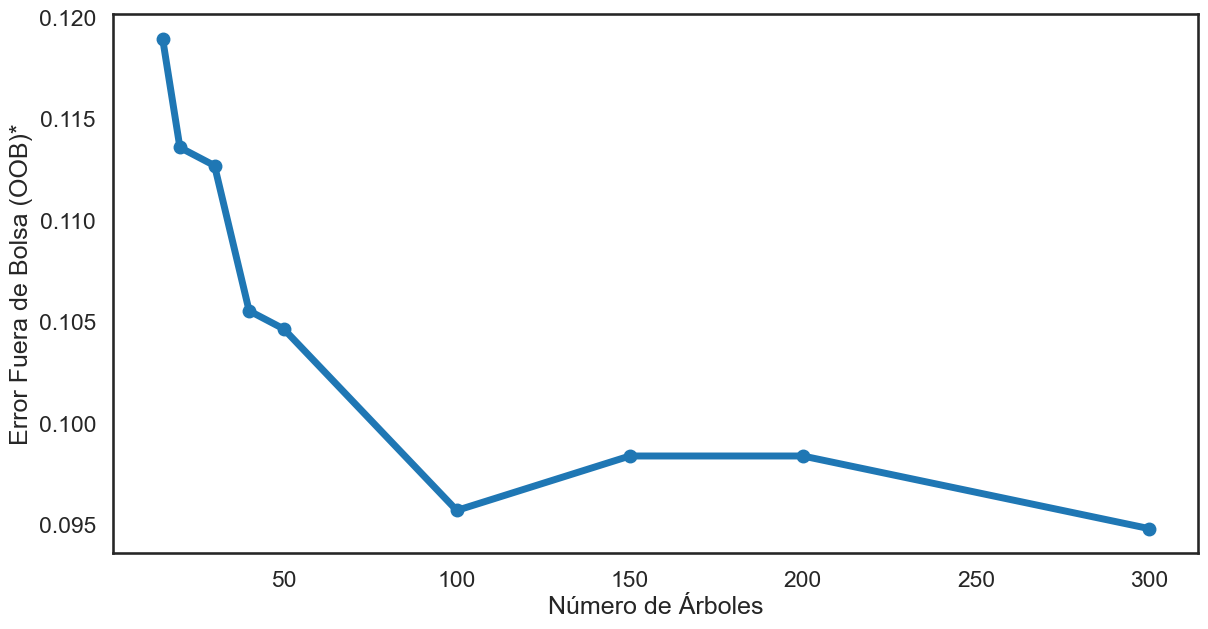

In [320]:
sns.set_context('talk')
sns.set_style('white')

ax = et_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='Error Fuera de Bolsa (OOB)*')
ax.set(xlabel='Número de Árboles')

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.8</p>

<p>Error Fuera de Bolsa (OOB) vs Número de Árboles.</p>

Esta vez 300 árboles tuvieron el error más bajo y hubo una diferencia significativa con respecto a uno en 250.

In [321]:
ETcla_300 = ExtraTreesClassifier(n_estimators=300
                                  ,oob_score=True 
                                  ,random_state=42
                                  ,n_jobs=-1
                                  ,bootstrap=True)

ETcla_300.fit(X_train2, label_train2)
oob_error300 = 1 - ETcla_300.oob_score_
oob_error300

0.0948121645796064

Al igual que en el caso del regresor, estudié el efecto de dos parámetros. La tabla 5.3 muestra los resultados.

In [323]:
ETcla_300 = ExtraTreesClassifier(n_estimators=300,oob_score=True,random_state=42,n_jobs=-1,bootstrap=True,
                                 max_features='log2')

ETcla_300.fit(X_train2, label_train2)
oob_error300 = 1 - ETcla_300.oob_score_
oob_error300

0.09302325581395354

In [324]:
ETcla_300 = ExtraTreesClassifier(n_estimators=300,oob_score=True,random_state=42,n_jobs=-1,bootstrap=True,
                                 max_depth=6)

ETcla_300.fit(X_train2, label_train2)
oob_error300 = 1 - ETcla_300.oob_score_
oob_error300

0.14579606440071557

### Resultados

Hyper-parámetro | oob_error
--- | ---
max_features 'log2' | 0.10286225402504467
max_depth 6 | 0.11270125223613592

$\\$

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 5.3</p>

<p>Valores de OOB para distintos hiperparámetros.</p>

### Informe

La figura 5.9 muestra el informe de clasificación en mi ejecución.

In [ ]:
label_pred_cla_et=ETcla_300.predict(X_val2)

print(classification_report(label_val2,label_pred_cla_rf))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       143
           1       0.92      0.93      0.92       137

    accuracy                           0.93       280
   macro avg       0.92      0.93      0.92       280
weighted avg       0.93      0.93      0.93       280



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.9</p>

<p>Informe de Clasificación.</p>

En general, si se compara con Random Forest, ambos algoritmos han dado una precisión casi similar.  

## Bagging

El algoritmo de bagging permite establecer el estimador base de tu elección. En los dos algoritmos anteriores, el estimador base era un árbol de decisión, que no podía modificarse. A continuación, mostraré el efecto de distintos estimadores sobre nuestros conjuntos de datos.

### Regresor Bagging

Utilizaré SVR, KNeighbors y Dummy regressors como estimadores base para las pruebas. Este modelo permite su uso para establecer un estimador base, distinto de un árbol de decisión como en algoritmos anteriores. La librería sklearn proporciona un dummy regressor, que se usa únicamente como referencia para comparar con otros regresores. El siguiente fragmento de código muestra cómo aplicar un bagging regressor con SVR como estimador base:

**NOTA**: El proceso del estimador SVR puede tomar de entre 20 a 35 minutos, dependiendo del rendimiento del CPU.

#### Estimador SVR

In [327]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor

Bagreg_100 = BaggingRegressor(estimator=SVR(),
                              n_estimators=100,
                              oob_score=True, 
                              random_state=42,
                              n_jobs=-1,
                              bootstrap=True)

Bagreg_100.fit(X_train1, label_train1)
oob_error100 = 1 - Bagreg_100.oob_score_
oob_error100

0.5260148669127701

#### Estimador de Regresor Dummy

In [329]:
Bagreg_100 = BaggingRegressor(estimator=DummyRegressor(),
                              n_estimators=100,
                              oob_score=True, 
                              random_state=42,
                              n_jobs=-1,
                              bootstrap=True)

Bagreg_100.fit(X_train1, label_train1)
oob_error100 = 1 - Bagreg_100.oob_score_
oob_error100

1.0001160275212564

#### Estimador K-Vecinos

In [330]:
Bagreg_100 = BaggingRegressor(estimator=KNeighborsRegressor(),
                              n_estimators=100,
                              oob_score=True, 
                              random_state=42,
                              n_jobs=-1,
                              bootstrap=True)

Bagreg_100.fit(X_train1, label_train1)
oob_error100 = 1 - Bagreg_100.oob_score_
oob_error100

0.11785238000305387

#### Resultados

| Estimador               | oob_error             |  
|-------------------------|----------------------|  
| SVR                     | 0.5260148888622115   |  
| DummyRegressor          | 1.0001160275212564 |  
| KNeighborsRegressor    | 0.11777280619044728   |


$\\$

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 5.4</p>

<p>El oob_error para distintos estimadores base (regresión).</p>

In [ ]:
label_pred_reg_bag=Bagreg_100.predict(X_val1)

El siguiente resultado muestra las métricas de error producidas por este regresor:

In [ ]:
error_metrics(label_pred_reg_bag,label_val1)

MSE:  126.62152338695904
RMSE:  11.252622955869402
Coefficient of determination:  0.8797593316689412


### Clasificador Bagging

Utilizaré tres estimadores: SVC, regresión logística y KNeighbors. El siguiente fragmento de código muestra cómo usar BaggingClassifier con SVC como estimador:

#### Estimador SVC

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Bagcla_100 = BaggingClassifier(estimator=SVC(),
                               n_estimators=100,
                               oob_score=True, 
                               random_state=42,
                               n_jobs=-1,
                               bootstrap=True)

Bagcla_100.fit(X_train2, label_train2)
oob_error100 = 1 - Bagcla_100.oob_score_
oob_error100

0.1636851520572451

#### Estimador de regresión logística  

In [ ]:
Bagcla_100 = BaggingClassifier(estimator=LogisticRegression(),
                               n_estimators=100,
                                oob_score=True, 
                                random_state=42,
                                n_jobs=-1,
                                bootstrap=True)

Bagcla_100.fit(X_train2, label_train2)
oob_error100 = 1 - Bagcla_100.oob_score_
oob_error100

0.11717352415026838

#### Estimador K-Vecinos

In [ ]:
Bagcla_100 = BaggingClassifier(estimator=KNeighborsClassifier(),
                               n_estimators=100,
                                oob_score=True, 
                                random_state=42,
                                n_jobs=-1,
                                bootstrap=True)

Bagcla_100.fit(X_train2, label_train2)
oob_error100 = 1 - Bagcla_100.oob_score_
oob_error100

0.1520572450805009

#### Resultados

| Estimador               | oob_error             |  
|-------------------------|----------------------|  
| SVC                   | 0.163685152057245  |  
| LogisticRegression          | 0.11627906976744184 |  
| KNeighborsClassifier    | 0.1520572450805009   |


$\\$

<p style="color:blue; margin-top: 5px; font-weight: bold;">Tabla 5.5</p>

<p>El oob_error para distintos estimadores base (regresión).</p>

In [ ]:
label_pred_cla_bag=Bagcla_100.predict(X_val2)

In [ ]:
print(classification_report(label_val2,label_pred_cla_bag))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       143
           1       0.78      0.97      0.86       137

    accuracy                           0.85       280
   macro avg       0.87      0.85      0.85       280
weighted avg       0.87      0.85      0.85       280



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.10</p>

<p>Informe de Clasificación.</p>

## AdaBoost

Este es un clasificador de *adaptive boosting* propuesto por Yoav Freund y Robert Schapire en 1996. Combina iterativamente múltiples clasificadores débiles para construir un clasificador fuerte.

### ¿Cómo Funciona?

Es un meta-estimador que primero ajusta un clasificador a tu conjunto de datos. Durante la inferencia, se detecta que algunos puntos de datos están mal clasificados. El algoritmo ahora se concentra en estos casos difíciles. Después de ajustar los pesos, el clasificador realiza un nuevo intento; esta vez, los puntos que fueron mal clasificados anteriormente deberían ser clasificados correctamente. Sin embargo, pueden existir otros puntos mal clasificados. Entonces comienza otra iteración sobre el mismo conjunto de datos con los pesos recién ajustados. Este proceso continúa hasta un número predeterminado de iteraciones o hasta que no se observen más mejoras en la construcción del modelo.

AdaBoost, como puedes ver, es un proceso de ensamblaje secuencial. El estimador base podría ser un árbol de decisión, un SVC (clasificador de vectores de soporte) u otro clasificador que soporte ponderación de muestras. A continuación, se discutirá su implementación tal como se proporciona en la librería sklearn.

### Implementación 

Sklearn proporciona la implementación de AdaBoost en `sklearn.ensemble.AdaBoostClassifier`.

La clase solo tiene unos pocos hiperparámetros. Como científico de datos, esto te evita tener que ajustar muchos parámetros, lo que supone un ahorro considerable de tiempo en desarrollo. 

In [345]:
# class sklearn.ensemble.AdaBoostClassifier(
# base_estimator=None, *,
# n_estimators=50, learning_rate=1.0,
# algorithm=′SAMME.R′, random_state=None)

Debes especificar el estimador base, que por defecto es un clasificador de árbol de decisión con profundidad máxima de 1, también conocido como *decision stumps*. Puedes especificar el número de estimadores hasta los cuales se realiza el boosting, que por defecto es 50. En caso de un ajuste perfecto, el proceso de aprendizaje se detiene automáticamente. El hiperparámetro *learning rate* decide el peso que se aplica en cada iteración. Una tasa de aprendizaje más alta aumenta la contribución de cada clasificador. Existe un balance entre la tasa de aprendizaje y el número de estimadores.  
En el hiperparámetro *algorithm*, puedes elegir entre `SAMME` y `SAMME.R`; el segundo converge más rápido.  

Por lo tanto, tienes un número realmente limitado de hiperparámetros para ajustar, lo que es una ventaja enorme al usar este algoritmo. Adicionalmente, puedes usar `GridSearchCV` para obtener los valores óptimos de estos parámetros. A continuación, se mostrará cómo usar el regresor AdaBoost.

### Regresor AdaBoost

El siguiente fragmento de código ilustra la implementación del regresor AdaBoost junto con el uso de GridSearch:

**NOTA**: El proceso del AdaBoostRegressor puede que tome entre 14 a 16, dependiendo del rendimiento del CPU.

In [346]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

Adareg = AdaBoostRegressor()

tuned_parameters = {'n_estimators': [50,100,200],'learning_rate':[0.001,0.01,0.1,0.5,0.9]}

Adareg_cv = GridSearchCV(Adareg, tuned_parameters,cv=3,scoring='r2')
Adareg_cv.fit(X_train1, label_train1)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.9],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

En el código anterior, estamos evaluando tres valores para el número de estimadores y cinco diferentes tasas de aprendizaje. Usamos la puntuación R² para la evaluación.

El parámetro `estimator` por defecto es un árbol de decisión. El número de estimadores define el número de etapas, y la tasa de aprendizaje decide el peso aplicado en cada iteración. Existe un balance entre la tasa de aprendizaje y el número de estimadores. Una tasa de aprendizaje más alta aumentaría la contribución de cada clasificador, por lo que puede ser necesario ajustar estos parámetros para alcanzar el nivel de precisión deseado.

Después de completar el entrenamiento, puedes obtener los valores óptimos de los dos hiperparámetros determinados por GridSearchCV. La salida es:

In [347]:
print(Adareg_cv.best_estimator_)

AdaBoostRegressor(learning_rate=0.1)


Así, una tasa de aprendizaje de 0.1 y un número de estimadores igual a 100 proporcionará el mejor rendimiento del modelo. Este modelo de mejor desempeño ya está disponible como un objeto devuelto. Usándolo, puedes realizar predicciones sobre los datos de prueba y evaluar el rendimiento del modelo. Esta es la salida en mi prueba:

In [350]:
label_pred_reg_ada=Adareg_cv.predict(X_val1)

In [351]:
error_metrics(label_pred_reg_ada,label_val1)

MSE:  296.2836760962751
RMSE:  17.212892728890026
Coefficient of determination:  0.5647194558381707


El puntaje R² (coeficiente de determinación) no es tan alto; esto probablemente se deba a que el modelo no es el más adecuado para nuestro conjunto de datos. Ahora, probaremos el clasificador AdaBoost.

### Clasificador AdaBoost

Usaremos nuevamente GridSearchCV para afinar los hiperparámetros. El siguiente fragmento de código muestra el uso del clasificador:

In [352]:
from sklearn.ensemble import AdaBoostClassifier

Adacla = AdaBoostClassifier(random_state=42)

tuned_parameters = {'n_estimators': [150,200,300],'learning_rate':[0.4,0.5,0.7]}

Adacla_cv = GridSearchCV(Adacla, tuned_parameters,cv=3,scoring='accuracy')
Adacla_cv.fit(X_train2, label_train2)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.4, 0.5, 0.7],
                         'n_estimators': [150, 200, 300]},
             scoring='accuracy')

Puedes revisar los valores de los hiperparámetros para este modelo de mejor desempeño. Este es el resultado en mi ejecución:

In [353]:
print(Adacla_cv.best_estimator_)

AdaBoostClassifier(learning_rate=0.5, n_estimators=300, random_state=42)


### Informe

Ahora puedes realizar las predicciones e imprimir el informe de clasificación. El resultado se muestra en la figura 5.11:

In [354]:
label_pred_cla_ada=Adacla_cv.predict(X_val2)
print(classification_report(label_val2,label_pred_cla_ada))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86       143
           1       0.83      0.88      0.86       137

    accuracy                           0.86       280
   macro avg       0.86      0.86      0.86       280
weighted avg       0.86      0.86      0.86       280



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.11</p>

<p>Informe de Clasificación.</p>

El clasificador AdaBoost funcionó mucho mejor alcanzando casi 0,9 en precisión. Hay margen de mejora ya que las clasificaciones erróneas mantienen baja la recuperación y la precisión.

La exactitud de la clasificación probablemente se encuentra dentro del rango aceptable. Probaremos otros algoritmos para ver si ofrecen mejores resultados.

#### Ventajas/Desventajas

Estas son algunas de las ventajas que ofrece el algoritmo:  
- Fácil de aplicar: solo unos pocos parámetros para ajustar.  
- Puedes usar cualquier clasificador base, siempre que soporte ponderación.  
- No es propenso al sobreajuste.  
- Soporta tareas de clasificación y regresión.  

Una gran desventaja de AdaBoost es que es sensible a valores atípicos y datos ruidosos.  
El algoritmo aumenta sus pesos e intenta incluirlos en la clasificación. Se recomienda limpiar primero el conjunto de datos de valores atípicos antes de aplicar el algoritmo. 

## Gradient Boosting 

El concepto de *aumento de gradiente* comprende dos palabras: *gradient* y *boosting*. Ya conoces el significado detrás de aumentar (*boosting*). La palabra *gradient* proviene de *gradient descent* (descenso por gradiente). Si tienes un problema de optimización numérica cuyo objetivo es minimizar la función de pérdida, entonces utilizas el algoritmo de *gradient boosting*. 

El *gradient descent* es un algoritmo de optimización iterativo de primer orden para encontrar un mínimo local de una función diferenciable. Puedes aplicar *gradient boosting* a cualquiera de las funciones de pérdida conocidas o a funciones propias que hayas creado. El algoritmo se puede aplicar tanto a problemas de regresión como de clasificación. Cuando se aplica a árboles de decisión para resolver problemas de regresión, a veces se le llama MART (*multiple additive regression trees*) o GBRT (*gradient-boosted regression trees*). 

El funcionamiento de *gradient boosting* puede explicarse con la ayuda de un diagrama de descenso por gradiente, como se muestra en la Fig. 5.12. 

<div>
  <img src="fig5.12.png" width="550"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.12</p>

<p>Optimización de gradientes para árboles de decisión.</p>

El algoritmo comienza con un único *base learner* o árbol. En cada iteración, para algún error o pérdida, se añade un nuevo árbol para reducir el error en la siguiente etapa. Este proceso continúa hasta que el error sea mínimo o nulo. Como puedes ver, el número de árboles aumenta por iteración, reduciendo el error cometido por el modelo en cada etapa.

#### Función de Pérdida

La función de pérdida que utilizas en *gradient boosting* depende del problema que estás intentando resolver.  

La librería *sklearn* proporciona funciones de pérdida tanto para problemas de clasificación como de regresión. Para clasificación, soporta dos tipos de funciones de pérdida: *deviance* y *exponential*. Para regresión, soporta cuatro funciones de pérdida: *squared_error*, *absolute_error*, *huber* y *quantile*.  

También puedes crear tu propia función de pérdida y establecerla como parámetro al llamar a este algoritmo.

#### Requisitos para Gradient Boosting 

El algoritmo *gradient boosting* involucra tres elementos:  
- Una función de pérdida a optimizar  
- Un aprendiz débil (*weak learner*) para hacer predicciones  
- Un modelo aditivo para agregar aprendices débiles y minimizar la función de pérdida 

Como has visto, la función de pérdida específica depende del tipo de problema que estás intentando resolver. También puedes usar una función definida por ti mismo, con la única condición de que sea diferenciable. 

Si tu aprendiz débil es un árbol de decisión, que usualmente es el caso, debes asegurarte de construir los árboles de manera voraz. Esto ayuda a elegir los mejores puntos de corte basados en puntajes de pureza, como Gini. Inicialmente, puedes usar árboles de decisión muy cortos que solo tengan un único corte, llamados “decision stump”. Un decision stump es un árbol de profundidad unitaria que decide únicamente un corte más significativo sobre las características. Puedes construir un aprendiz débil restringiendo el número de capas, nodos, cortes o nodos hoja. Esto asegura que los aprendices permanezcan débiles, pero los árboles puedan construirse de manera voraz.

El último punto, modelo aditivo, significa que deberías ser capaz de añadir un solo árbol en cada iteración, sin afectar los árboles existentes en cada etapa. En cada iteración, calculamos la pérdida o el error y recalculamos los coeficientes en una ecuación de regresión o, si estás usando esto en redes neuronales, los pesos en la capa correspondiente de la red. En cada iteración, añadimos un árbol al modelo que reduce la pérdida. Hacemos esto parametrizando el árbol. Simplemente cambia estos parámetros para mover el árbol en la dirección correcta. 

#### Implementación

La librería sklearn proporciona la implementación del algoritmo de gradient boosting en dos clases: `sklearn.ensemble.GradientBoostingClassifier` y `sklearn.ensemble.GradientBoostingRegressor`. A continuación, mostraré cómo implementar estas clases en nuestro proyecto.

In [355]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_reg = GradientBoostingRegressor(learning_rate=0.4,
                                    max_depth=3,
                                    n_estimators=300).fit(X_train1, label_train1)

### Regresor Gradient Boosting

En el algoritmo AdaBoost, utilicé `GridSearchCV` para obtener los valores óptimos de los parámetros. Puedes hacer lo mismo en este y en cualquiera de los algoritmos siguientes. Para simplificar, he usado algunos valores predeterminados en el código anterior. Después del entrenamiento, se realizan las predicciones y se imprimen las métricas de error usando el siguiente código:

In [356]:
label_pred_reg_gbr = GBR_reg.predict(X_val1)
error_metrics(label_pred_reg_gbr,label_val1)

MSE:  104.73493294610367
RMSE:  10.234008645008254
Coefficient of determination:  0.9017323912476399


Observamos que la puntuación R-2 es mucho mejor aquí que en nuestro algoritmo anterior—
AdaBoost.

### Clasificador Gradient Boosting

Utiliza el clasificador utilizando el siguiente fragmento de código:

In [358]:
from sklearn.ensemble import GradientBoostingClassifier

GBC_cla = GradientBoostingClassifier(learning_rate=0.5,
                                     max_depth=3,
                                     n_estimators=200).fit(X_train2, label_train2)

### Informe

Nuevamente, he utilizado algunos valores predeterminados para los hiperparámetros. Se hacen las predicciones y se imprime el informe de clasificación. El informe de clasificación generado en mi ejecución se muestra en la figura 5.13.

In [359]:
label_pred_cla_gbc=GBC_cla.predict(X_val2)
print(classification_report(label_val2,label_pred_cla_gbc))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       143
           1       0.91      0.95      0.93       137

    accuracy                           0.93       280
   macro avg       0.93      0.93      0.93       280
weighted avg       0.93      0.93      0.93       280



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.13</p>

<p>Informe de Clasificación.</p>

Compara esto con el resultado de AdaBoost y notarás que los resultados son
mucho mejor que el algoritmo anterior.

### Ventajas y Desventajas

El algoritmo de gradient boosting puede resolver casi cualquier función objetivo para la cual podamos calcular un gradiente. Esto significa que puede usarse para ranking y regresión de Poisson, tareas que son más difíciles de lograr usando random forest, como viste en el capítulo anterior.  
El algoritmo es adecuado para abordar problemas de clasificación múltiple que presentan desequilibrios entre clases.

En el lado negativo, este algoritmo es más sensible al sobreajuste, especialmente cuando los datos son ruidosos. En segundo lugar, el entrenamiento puede tardar mucho tiempo porque los árboles se construyen de manera secuencial. Por último, en clasificación multiclase, al descomponer el problema en múltiples clasificadores binarios-versus-todos, se produce un aumento considerable del tiempo de entrenamiento.

## XGBoost

Lanzado en 2014, *XGBoost* puede considerarse como una mejora del framework de gradient boosting que se vio  previamente. Como indica el nombre, es un framework de Aumento Extremo de Gradiente (*eXtreme Gradient Boosting*). Combina de manera óptima técnicas de software y hardware, y principalmente soporta computación distribuida en paralelo. Funciona en entornos distribuidos como *Hadoop Yarn*, *SGE* (*Sun Grid Engine*), *MPI*, *Apache Spark*, *Apache Flink*, clústeres *AWS EC2*, entre otros. Podemos decir que es una librería de gradient boosting distribuida y optimizada, diseñada para eficiencia, flexibilidad y portabilidad. 

*XGBoost* soporta regularización L1 (*Lasso*) y L2 (*Ridge*), lo que ayuda a prevenir el sobreajuste. La regularización deseada se especifica mediante los parámetros `alpha` y `lambda` en la implementación de sklearn. Soporta procesamiento en paralelo; el hiperparámetro `nthread` permite definir cuántos núcleos usar, y si no se especifica, el algoritmo detecta automáticamente los núcleos disponibles.

El algoritmo maneja valores faltantes. Cuando encuentra un valor faltante en un nodo, prueba tanto la división izquierda como la derecha para obtener la mayor reducción de pérdida. Ejecuta validación cruzada en cada iteración del proceso de boosting, lo que ayuda a determinar el número óptimo de iteraciones en una sola corrida. En contraste, el algoritmo de grid search usado en *Gradient Boosting Machine* (*GBM*) utiliza un enfoque codicioso en las divisiones, deteniéndose al encontrar pérdida negativa. Por otro lado, *XGBoost* divide hasta la profundidad máxima especificada y luego poda el árbol hacia atrás, eliminando divisiones que no generen ganancia positiva. *XGBoost* es una librería de código abierto.

Resumen de características importantes de XGBoost:  
- Construcción de árboles paralelizada  
- Soporta poda de árboles (por ejemplo, enfoque depth-first)  
- Optimizado para caché: estructuras de datos y optimizaciones de código  
- Implementación en varios sistemas distribuidos  
- Soporta cálculos out-of-core  
- Utiliza regularizaciones L1/L2 para evitar sobreajuste  
- Maneja datos dispersos de manera eficiente  
- Emplea el algoritmo weighted quantile sketch para divisiones óptimas  
- Soporta validación cruzada  
- Implementaciones en Java, Scala, Julia, Perl y otros lenguajes  
- Implementaciones para Linux, Windows y macOS  
- Funciona tanto para regresión como clasificación  

XGBoost es significativamente más rápido en comparación con otras implementaciones de gradient boosting previas a su introducción, como se observa en múltiples benchmarks.

Una desventaja es que, al igual que *GBM*, no funciona bien con conjuntos de datos dispersos. Es sensible a los valores atípicos, ya que obliga a cada clasificador a corregir los errores de los aprendices anteriores. En general, no es fácilmente escalable, ya que cada estimador basa su corrección en el anterior.

### Implementación

Para usar XGBoost en tus aplicaciones, necesitarás instalarlo en tu máquina.  
Puedes hacerlo ejecutando `pip install` de la siguiente manera:

In [361]:
# pip install xgboost

Una vez instalada la librería, crear modelos tanto de regresión como de clasificación es trivial. Primero mostraré cómo crear un modelo de regresión.

### Regresor XGBoost

El siguiente fragmento de código aplica el regresor a nuestro conjunto de datos.

In [362]:
from xgboost import XGBRegressor

XGB_reg = XGBRegressor(learning_rate=0.4,
                        max_depth=3,
                        n_estimators=300).fit(X_train1, label_train1)

El método toma varios parámetros. Puedes optar por sus valores por defecto, a menos que quieras tener un control total del proceso y quizás ajustar el rendimiento. Para los parámetros que utilicé en la llamada anterior, podríamos haber usado `GridSearchCV` como se mostró antes para obtener los valores óptimos.  
Después del entrenamiento del modelo, evaluamos su rendimiento con el siguiente código. Este es el resultado de mi ejecución de prueba:

In [363]:
label_pred_reg_xgb = XGB_reg.predict(X_val1)
error_metrics(label_pred_reg_xgb,label_val1)

MSE:  100.80415062798096
RMSE:  10.040127022502302
Coefficient of determination:  0.9052871180427574


Considerando que el entrenamiento del modelo es mucho más rápido que en los algoritmos anteriores, el valor de R-2 es bastante aceptable. A continuación, mostraré cómo usar el clasificador.

### Clasificador XGBoost

Se usa el clasificador como se muestra en el fragmento de código aquí:

In [364]:
from xgboost import XGBClassifier

XGB_cla = XGBClassifier(learning_rate=0.5,
                        max_depth=3,
                        n_estimators=200).fit(X_train2, label_train2)

### Informe

Se prueba el rendimiento del modelo imprimiendo el informe de clasificación. El informe de clasificación generado en mi ejecución de prueba se muestra en la figura 5.14.

In [365]:
label_pred_cla_xgb=XGB_cla.predict(X_val2)
print(classification_report(label_val2,label_pred_cla_xgb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       143
           1       0.91      0.93      0.92       137

    accuracy                           0.92       280
   macro avg       0.92      0.92      0.92       280
weighted avg       0.92      0.92      0.92       280



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.14</p>

<p>Informe de Clasificación.</p>

Considerando que el tamaño de nuestro conjunto de datos es de solo 1055 instancias, la precisión obtenida es buena. Como última recomendación, en lugar de usar XGBoost en conjuntos de datos pequeños, utilízalo en conjuntos realmente grandes; notarás una diferencia significativa en los tiempos de entrenamiento y también observarás puntuaciones de precisión aceptables.

## CatBoost

*CatBoost* es otra librería de código abierto que proporciona un marco de gradient boosting. Originalmente desarrollada en *Yandex*, se liberó como open-source en julio de 2017 y todavía está en desarrollo activo con *Yandex* y la comunidad. La principal mejora, en comparación con otros frameworks de GB, es el soporte para características categóricas. Como científico de datos, esto te ahorra el preprocesamiento de datos y la conversión de esas columnas categóricas a valores numéricos.

Otra característica importante de esta implementación es que produce resultados significativos incluso con los valores por defecto de los parámetros. Si consultas su documentación, verás una gran cantidad de parámetros. Experimentar con todos ellos sería un problema. Afortunadamente, los valores por defecto asignados por los diseñadores producen resultados significativos en la mayoría de las situaciones.

Otro beneficio importante de este framework es que proporciona predicciones rápidas, por lo que es ideal para aplicaciones donde la latencia es crítica. En *Yandex*, maneja millones de usuarios cada mes.

Con su novedoso esquema de gradient boosting, los diseñadores pudieron reducir el sobreajuste. También ofrece excelente soporte para GPUs para acelerar el entrenamiento y la inferencia. Además de tareas de clasificación y regresión, también soporta ranking. Funciona en *Linux*, *Windows* y *macOS*. Está disponible en Python y R. Los modelos construidos con *CatBoost* pueden ser usados para predicciones en *C++*, *Java*, *C#*, *Rust* y otros lenguajes.

En resumen, se utiliza prácticamente en muchas aplicaciones desarrolladas por *Yandex* y empresas como *CERN* y *Cloudflare*; por ejemplo, en sistemas de búsqueda, recomendaciones, asistentes personales, coches autónomos y predicción meteorológica.  
A continuación, mostraré cómo usar *CatBoost* en tus proyectos.

### Implementación

Para instalar *CatBoost* en tu máquina, utiliza pip install de la siguiente manera: 

In [367]:
# pip install catboost

Primero, discutiré la implementación del regresor, seguida por la del clasificador.

### Regresor CatBoost

Para aplicar *CatBoost* en nuestro conjunto de datos, utiliza el siguiente código:

In [370]:
from catboost import CatBoostRegressor

cat_model_reg = CatBoostRegressor(iterations=300,
                                    learning_rate=0.7,
                                    random_seed=42,
                                    depth=5)

cat_model_reg.fit(X_train1, label_train1, 
                  cat_features=None, 
                  eval_set=(X_val1, label_val1), 
                  verbose=False)

Ten en cuenta que nuestro conjunto de datos no tiene características categóricas. Si tu conjunto de datos contiene características categóricas, lista los nombres de todas tus variables categóricas como valor de la variable `cat_features`.  
Después del entrenamiento del modelo, evalúa su rendimiento utilizando las siguientes dos instrucciones. Este es el resultado en mi ejecución:

In [371]:
label_pred_reg_cat=cat_model_reg.predict(X_val1)
error_metrics(label_pred_reg_cat,label_val1)

MSE:  98.20372680432128
RMSE:  9.90977935194933
Coefficient of determination:  0.908991565534382


A continuación, demostraré la implementación del clasificador.

### Clasificador CatBoost

Aplica el clasificador de la siguiente manera:  

In [372]:
from catboost import CatBoostClassifier

cat_model_class = CatBoostClassifier(iterations=300,
                                     learning_rate=0.7,
                                     random_seed=42,
                                     depth=3)

cat_model_class.fit(X_train2, label_train2, 
                    cat_features=None, 
                    eval_set=(X_val2, label_val2), 
                    verbose=False)

### Informe

Como antes, realiza las predicciones e imprime el informe de clasificación. La Figura 5.15 muestra el informe de clasificación generado en mi ejecución. 

In [373]:
label_pred_cla_cat=cat_model_class.predict(X_val2)
print(classification_report(label_val2,label_pred_cla_cat))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       143
           1       0.90      0.96      0.93       137

    accuracy                           0.93       280
   macro avg       0.93      0.93      0.93       280
weighted avg       0.93      0.93      0.93       280



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.15</p>

<p>Informe de Clasificación.</p>

Como puedes observar, el desempeño de este clasificador comparte el primer lugar con el random forest, alcanzando un 93% de precisión.


## LightGBM

Lanzado en 2016, *LightGBM* es otro framework de boosting distribuido de código abierto desarrollado originalmente por Microsoft. Considerando los grandes conjuntos de datos disponibles hoy en día, se desarrolló con énfasis en el rendimiento y la escalabilidad. Posee casi todas las características de XGBoost, siendo la principal diferencia la construcción de los árboles. Convencionalmente, un árbol se construye fila por fila. *LightGBM* crece los árboles hoja por hoja. Se selecciona durante la ramificación la hoja con mayor probabilidad de disminuir la pérdida. La figura 5.16 ofrece una representación visual de los dos esquemas.

<div>
  <img src="fig5.16.png" width="450"/>
</div>

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.16</p>

<p>Construcción de árboles en hileras y hojas.</p>

La mayoría de los algoritmos seleccionan el mejor punto de división basado en las características ordenadas. En lugar de esto, *LightGBM* utiliza un algoritmo de aprendizaje de árbol de decisión basado en histogramas altamente optimizado, lo que ofrece mejor eficiencia y consumo de memoria.

El algoritmo *LightGBM* también emplea una técnica novedosa llamada Muestreo Unilateral Basado en Gradientes, o *Gradient-Based One Side Sampling* (*GOSS*). *GOSS* funciona bajo el principio de que las instancias con gradientes más grandes contribuirán más a la ganancia de información. Por lo tanto, elimina aleatoriamente las instancias con gradientes pequeños mientras mantiene la precisión de la información.

También emplea otra característica novedosa llamada Paquete de Funciones Exclusivas, o *Exclusive Feature Bundling* (*EFB*), un método para reducir el número de características efectivas. En un conjunto de datos disperso, muchas características son mayormente exclusivas. EFB agrupa estas características para reducir la dimensionalidad. El *EFB*, un paquete exclusivo de características, es así un conjunto de estas características exclusivas.

Además de estas diferencias, ofrece todas las demás ventajas de XGBoost. Soporta entrenamiento en paralelo y el uso de múltiples funciones de pérdida. Admite optimización para datos dispersos, tiene regularización y soporte para parar prematuramente (*early stopping*).

En resumen, sus características pueden resumirse de la siguiente manera:
- Bajo uso de memoria
- Entrenamiento distribuido en paralelo
- Soporte para GPU
- Proporciona mayor precisión
- Ideal para grandes conjuntos de datos
- Entrenamiento más rápido
- Soporta variables categóricas

Las desventajas de LightGBM son que, debido a su alta sensibilidad, generalmente no funciona bien con conjuntos de datos pequeños y tiene demasiados parámetros para ajustar.
Ahora demostraré su uso.

### Implementación

Como en los casos anteriores, instalaremos la biblioteca usando pip install.

In [375]:
# pip install lightgbm

Al igual que antes, demostraré el uso tanto del regresor como del clasificador.

### Regressor LGBM

Aplicas el regresor a nuestro conjunto de datos usando el siguiente código:

In [387]:
from lightgbm import LGBMRegressor

LGBM_reg = LGBMRegressor(iterations=100,
                         learning_rate=0.3,
                         depth=2) 

LGBM_reg.fit(X_train1, label_train1,
             eval_set=[(X_val1, label_val1)])


LGBMRegressor(depth=2, iterations=100, learning_rate=0.3)

Realizas las predicciones e imprimes las métricas de error. Este es el resultado en mi ejecución:

In [388]:
label_pred_reg_lgbm=LGBM_reg.predict(X_val1)
error_metrics(label_pred_reg_lgbm,label_val1)

MSE:  89.05194394188753
RMSE:  9.436733753894275
Coefficient of determination:  0.9170497217299074


Como puedes observar, nos ha dado buenos resultados. A continuación, demostraré el uso de un clasificador.

### Clasificador LGBM

Usas el clasificador con el siguiente código:

In [389]:
from lightgbm import LGBMClassifier

LGBM_cla = LGBMClassifier(iterations=300,
                          learning_rate=0.4,
                          depth=3)

LGBM_cla.fit(X_train2, label_train2,
             eval_set=(X_val2, label_val2))

LGBMClassifier(depth=3, iterations=300, learning_rate=0.4)

### Informe

Realizas la evaluación del modelo e imprimes el informe de clasificación de la siguiente manera. El informe de clasificación generado en mi ejecución se muestra en la figura 5.17.

In [390]:
label_pred_cla_lgbm=LGBM_cla.predict(X_val2)
print(classification_report(label_val2,label_pred_cla_lgbm))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       143
           1       0.93      0.92      0.93       137

    accuracy                           0.93       280
   macro avg       0.93      0.93      0.93       280
weighted avg       0.93      0.93      0.93       280



<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.17</p>

<p>Informe de Clasificación.</p>

Habiendo completado la discusión de los diferentes algoritmos de boosting, ahora resumiré nuestras observaciones.

## Resumen del Rendimiento

En este paso mostraremos las métricas de rendimiento de todos los regresores y clasificadores.

### Regresores

En mi informe de resumen, también he incluido el bosque aleatorio. Al igual que otros algoritmos, este se probó tanto para regresión como para clasificación. Utilicé los mismos conjuntos de datos para todas las pruebas. La figura 5.18 muestra el resumen para la regresión.

In [391]:
data = {'Random Forest': [mean_squared_error(label_pred_reg_rf,label_val1),np.sqrt(mean_squared_error(label_pred_reg_rf,label_val1)),r2_score(label_pred_reg_rf,label_val1)],
        'AdaBoost': [mean_squared_error(label_pred_reg_ada,label_val1),np.sqrt(mean_squared_error(label_pred_reg_ada,label_val1)),r2_score(label_pred_reg_ada,label_val1)],
        'Gradient Boosting': [mean_squared_error(label_pred_reg_gbr,label_val1),np.sqrt(mean_squared_error(label_pred_reg_gbr,label_val1)),r2_score(label_pred_reg_gbr,label_val1)],
        'XGBoost': [mean_squared_error(label_pred_reg_xgb,label_val1),np.sqrt(mean_squared_error(label_pred_reg_xgb,label_val1)),r2_score(label_pred_reg_xgb,label_val1)],
        'CatBoost': [mean_squared_error(label_pred_reg_cat,label_val1),np.sqrt(mean_squared_error(label_pred_reg_cat,label_val1)),r2_score(label_pred_reg_cat,label_val1)],
        'LightGBM': [mean_squared_error(label_pred_reg_lgbm,label_val1),np.sqrt(mean_squared_error(label_pred_reg_lgbm,label_val1)),r2_score(label_pred_reg_lgbm,label_val1)]}
 
pd.DataFrame(data, index=['MSE','RMSE','R2 score'])

,Random Forest,AdaBoost,Gradient Boosting,XGBoost,CatBoost,LightGBM
MSE,77.940475,296.283676,104.734933,100.804151,98.203727,89.051944
RMSE,8.828390,17.212893,10.234009,10.040127,9.909779,9.436734
R2 score,0.925909,0.564719,0.901732,0.905287,0.908992,0.917050


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.18</p>

<p>Informe resumido de la regresión.</p>

Para el conjunto de datos que hemos utilizado, el bosque aleatorio ha dado una mejor precisión en comparación con los demás. Esto se debe principalmente al tamaño del conjunto de datos, que es demasiado pequeño para otros algoritmos. Los algoritmos posteriores proporcionan ventajas adicionales para conjuntos de datos realmente grandes. La figura 5.19 muestra la gráfica de regresión generada por el bosque aleatorio.

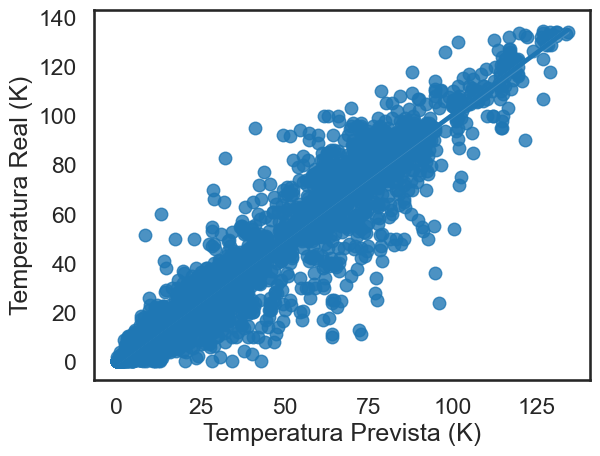

In [393]:
sns.regplot(x=label_pred_reg_rf, y=label_val1)
plt.xlabel('Temperatura Prevista (K)')
plt.ylabel('Temperatura Real (K)')

plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.19</p>

<p>Gráfico de regresión generado por bosque aleatorio (random forest).</p>

### Clasificadores

Veamos ahora las comparaciones de clasificación. La figura 5.20 muestra un resumen del informe de clasificación para varios algoritmos.

In [395]:
metrics = []
models = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'CatBoost', 'LightGBM']
predictions=[label_pred_cla_rf, label_pred_cla_ada, label_pred_cla_gbc, label_pred_cla_xgb,
             label_pred_cla_cat, label_pred_cla_lgbm]

for lab,i in zip(models, predictions):
    precision, recall, fscore, _ = score(label_val2, i, average='weighted')
    accuracy = accuracy_score(label_val2, i)
    auc = roc_auc_score(label_binarize(label_val2, classes=[0,1]),
                        label_binarize(i, classes=[0,1]),
                        average='weighted')
    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, name=lab))
    
metrics = pd.concat(metrics, axis=1)

metrics

,Random Forest,AdaBoost,Gradient Boosting,XGBoost,CatBoost,LightGBM
precision,0.925033,0.858486,0.929425,0.921821,0.934026,0.928637
recall,0.925000,0.857143,0.928571,0.921429,0.932143,0.928571
fscore,0.925005,0.857114,0.928571,0.921437,0.932119,0.928557
accuracy,0.925000,0.857143,0.928571,0.921429,0.932143,0.928571
auc,0.925042,0.857690,0.928998,0.921699,0.932801,0.928385


<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.20</p>

<p>Informe resumido de varios algoritmos.</p>

Como se puede ver, *CatBoost* es el ganador en este caso. Ahora imprimiremos la matriz de confusión del mejor clasificador encontrado:

La figura 5.21 presenta la matriz de confusión generada por *CatBoost*.

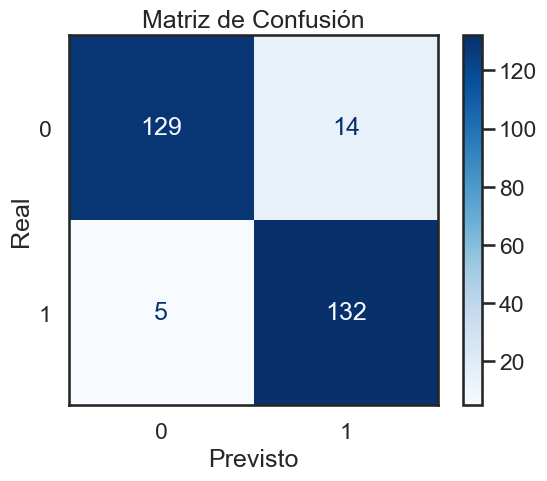

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(label_val2,label_pred_cla_cat), display_labels=cat_model_class.classes_)
disp.plot(cmap='Blues')

plt.xlabel('Etiqueta Prevista')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

<p style="color:blue; margin-top: 5px; font-weight: bold;">Fig. 5.21</p>

<p>Matriz de confusión para CatBoost.</p>

## Resumen

En este capítulo, estudiaste las técnicas de conjunto estadístico para mejorar el rendimiento de un clasificador de árboles de decisión. Analizaste tanto las técnicas de *bagging* como las de *boosting*. A lo largo del tiempo se han desarrollado varias técnicas de *bagging* y *boosting*, cada una incorporando mejoras sobre la anterior. Esto no significa que debas utilizar únicamente la más reciente. Como has visto, las técnicas avanzadas también requieren conjuntos de datos más grandes. Por lo tanto, como científico de datos, puedes comenzar con un árbol de decisión simple o un bosque aleatorio, y si estos no ofrecen los resultados deseados, entonces avanzar hacia modelos más sofisticados.